In [139]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.simplefilter("ignore")

In [140]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [141]:
df = pd.read_csv("C:/Users/HP/Desktop/Language Detection.csv")

In [142]:
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [143]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [144]:
df.tail()

,Text,Language
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [146]:
df.dtypes

Text        object
Language    object
dtype: object

In [147]:
df.describe()

,Text,Language
count,10337,10337
unique,10267,17
top,Мне жаль.,English
freq,3,1385


In [148]:
df.columns

Index(['Text', 'Language'], dtype='object')

In [149]:
len(df)

10337

In [150]:
type(df)

pandas.core.frame.DataFrame

In [151]:
df["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [152]:
X = df["Text"]
y = df["Language"]

In [153]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [154]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

In [155]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [156]:
X.shape

(10337, 39404)

In [157]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [158]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [159]:
y_pred = model.predict(x_test)

In [160]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [161]:
print("Accuracy is :",ac)

Accuracy is : 0.9825918762088974


In [162]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        85
           1       0.99      0.94      0.96        87
           2       0.99      0.99      0.99       121
           3       0.92      1.00      0.96       285
           4       0.99      0.98      0.98       206
           5       0.99      1.00      0.99        94
           6       1.00      1.00      1.00        76
           7       1.00      1.00      1.00         8
           8       1.00      0.99      1.00       137
           9       1.00      0.94      0.97        69
          10       0.99      1.00      1.00       106
          11       1.00      0.99      0.99       152
          12       1.00      0.96      0.98       137
          13       0.99      0.99      0.99       152
          14       0.99      0.99      0.99       154
          15       1.00      1.00      1.00       102
          16       1.00      0.93      0.96        97

    accuracy              

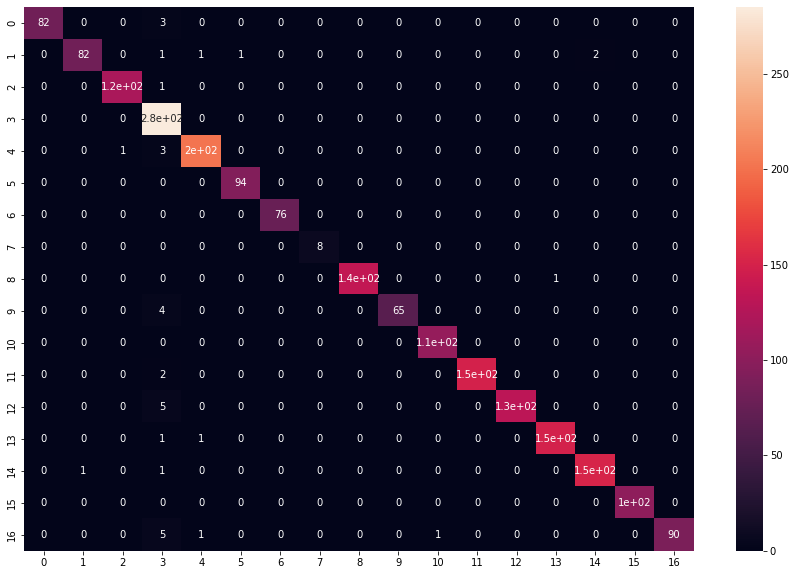

In [163]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [164]:
def predict(text):
     x = cv.transform([text]).toarray() 
     lang = model.predict(x) 
     lang = le.inverse_transform(lang) 
     print("The langauge is in",lang[0])

In [165]:
predict('அன்பு')

The langauge is in Tamil


In [166]:
predict('Park and Eleanor are going to get married soon')

The langauge is in English


In [167]:
predict('നൽകുന്നു')

The langauge is in Malayalam


In [168]:
predict(' विकिसमाचार')

The langauge is in Hindi


In [169]:
predict(' Larry Sanger e Jimmy Wales fundaram a Wikipédia')

The langauge is in Portugeese


In [170]:
predict('je sais')

The langauge is in French


In [171]:
predict('Voor Wikipedia is een apart programma ontworpen')

The langauge is in Dutch


In [172]:
predict('Su popularidad fue poca')

The langauge is in Spanish


In [173]:
predict('καλοσύνης και καλλιέργεια και εκλεπτυσμένη')

The langauge is in Greek


In [174]:
predict('Одним из основных достоинств Википедии ')

The langauge is in Russian


In [175]:
predict('Da quando Wikipedia ha raggiunto')

The langauge is in Italian


In [176]:
predict('Doğrudan ya da dolaylı hakaretlere hoşgörü gösterilmez')

The langauge is in Turkish


In [177]:
predict('Den funktionsprincip ')

The langauge is in Sweedish


In [178]:
predict(' شكك النقاد والمحللون بها وتساءلوا عن')

The langauge is in Arabic


In [179]:
predict('Ich habe eine nahezu perfekte Punktzahl erhalten')

The langauge is in German


In [180]:
predict('ಚಿಂತಿಸಬೇಡಿ ಚಿಂತಿಸಬೇಡಿ, ಇದರರ್ಥ ಅದರ ಬಗ್ಗೆ ಚಿಂತಿಸಬೇಡಿ')

The langauge is in Kannada


In [181]:
def removeSymbolsAndNumbers(text):        
        text = re.sub(r'[{}]'.format(string.punctuation), '', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[@]', '', text)

        return text.lower()

In [182]:
def removeEnglishLetters(text):        
        text = re.sub(r'[a-zA-Z]+', '', text)
        return text.lower()

In [183]:
X0 = df.apply(lambda x: removeEnglishLetters(x.Text) if x.Language in ['Russian','Malyalam','Hindi','Kannada','Tamil','Arabic']  else x.Text, axis = 1)
X0

0         Nature, in the broadest sense, is the natural...
1        "Nature" can refer to the phenomena of the phy...
2        The study of nature is a large, if not the onl...
3        Although humans are part of nature, human acti...
4        [1] The word nature is borrowed from the Old F...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Length: 10337, dtype: object